In [1]:
from google.colab import files

In [2]:
files.upload()

Saving Temperature_Prediction.csv to Temperature_Prediction.csv


{'Temperature_Prediction.csv': b'Temperature - (Celsius), Year,Month\r\n7.72768,1901,January\r\n8.936,1901,February\r\n16.9632,1901,March\r\n21.2741,1901,April\r\n26.0497,1901,May\r\n29.3811,1901,June\r\n29.2391,1901,July\r\n27.9718,1901,August\r\n25.2887,1901,September\r\n21.2279,1901,October\r\n15.7539,1901,November\r\n10.917,1901,December\r\n9.90868,1902,January\r\n11.2238,1902,February\r\n17.3237,1902,March\r\n22.1011,1902,April\r\n26.7454,1902,May\r\n28.6774,1902,June\r\n29.3654,1902,July\r\n28.2741,1902,August\r\n25.1602,1902,September\r\n20.8884,1902,October\r\n15.2654,1902,November\r\n9.94845,1902,December\r\n7.69502,1903,January\r\n10.009,1903,February\r\n13.2206,1903,March\r\n19.5796,1903,April\r\n25.6285,1903,May\r\n29.7751,1903,June\r\n29.0659,1903,July\r\n27.9325,1903,August\r\n26.0494,1903,September\r\n21.3515,1903,October\r\n14.0782,1903,November\r\n9.19253,1903,December\r\n6.93021,1904,January\r\n11.3519,1904,February\r\n15.2716,1904,March\r\n21.871,1904,April\r\n26.278

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [6]:
df=pd.read_csv('Temperature_Prediction.csv')

In [7]:
df.rename(columns={'Temperature - (Celsius)':'Avg_temp',' Year':'Year'},inplace=True)

In [8]:
df

,Avg_temp,Year,Month
0,7.72768,1901,January
1,8.93600,1901,February
2,16.96320,1901,March
3,21.27410,1901,April
4,26.04970,1901,May
...,...,...,...
1387,27.63320,2016,August
1388,26.71790,2016,September
1389,22.39820,2016,October
1390,15.76720,2016,November


In [9]:
ndf=pd.DataFrame()
ndf['Year']=df['Year'].unique()
lis=[]
for i in df['Year'].unique():
  ls=df[df.Year==i]['Avg_temp'].mean()
  lis.append(ls)
ndf['temp']=lis

In [10]:
ndf

,Year,temp
0,1901,20.060848
1,1902,20.406836
2,1903,19.464821
3,1904,19.970376
4,1905,19.448188
...,...,...
111,2012,20.053536
112,2013,20.652717
113,2014,20.527868
114,2015,20.559059


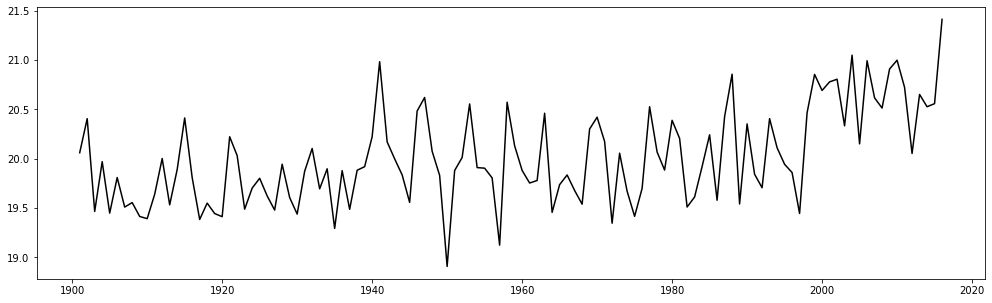

In [11]:
plt.figure(figsize=(17,5))
plt.plot(ndf['Year'],ndf['temp'],color='black')

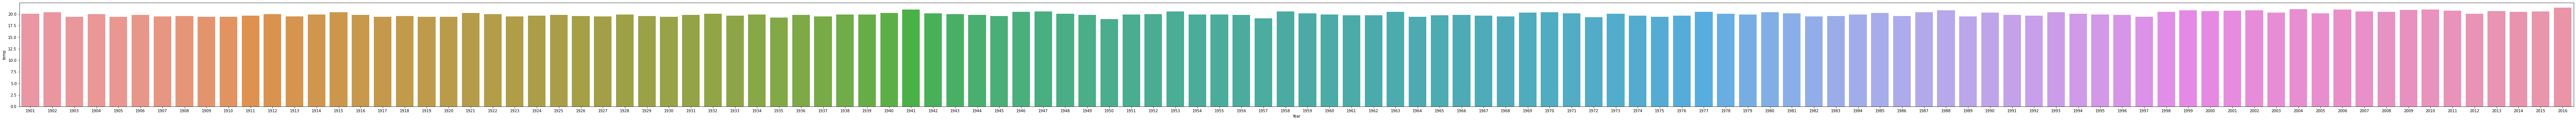

In [12]:
plt.figure(figsize=(120,5))
sns.barplot(x='Year',y='temp',data=ndf)

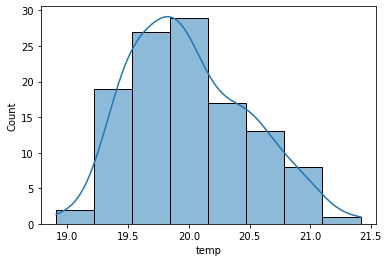

In [13]:
sns.histplot(ndf['temp'],kde=True)

In [14]:
meanvlu=ndf['temp'].mean()

In [15]:
std_val=ndf['temp'].std()

In [16]:
std_3=meanvlu+(2*std_val)

In [17]:
neg_std_3=meanvlu-(2*std_val)

In [18]:
ndf=ndf[(ndf['temp']>neg_std_3)&(ndf['temp']<std_3)]

In [19]:
x=ndf.drop(['temp'],axis=1)
y=ndf['temp']

In [20]:
Scaler=StandardScaler()
Scaled_x=Scaler.fit_transform(x)

In [22]:
Reg=LinearRegression()

In [23]:
Reg.fit(Scaled_x,y)
pdf=pd.DataFrame()
pdf['Year']=[i for i in range(2000,2100)]
pdf['temp']=Reg.predict(Scaler.transform(pdf[['Year']]))

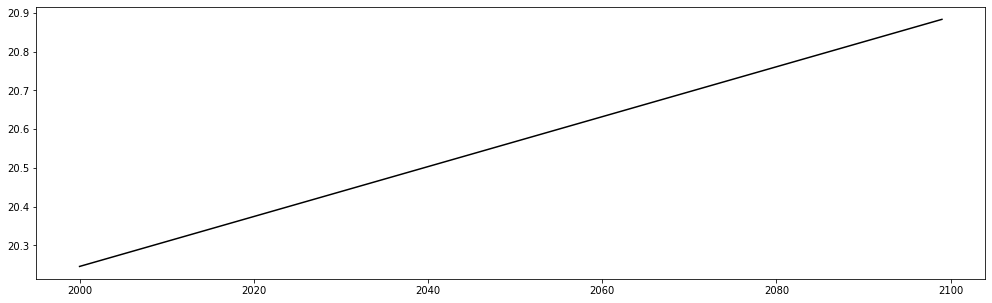

In [24]:
plt.figure(figsize=(17,5))
plt.plot(pdf['Year'],pdf['temp'],color='black')

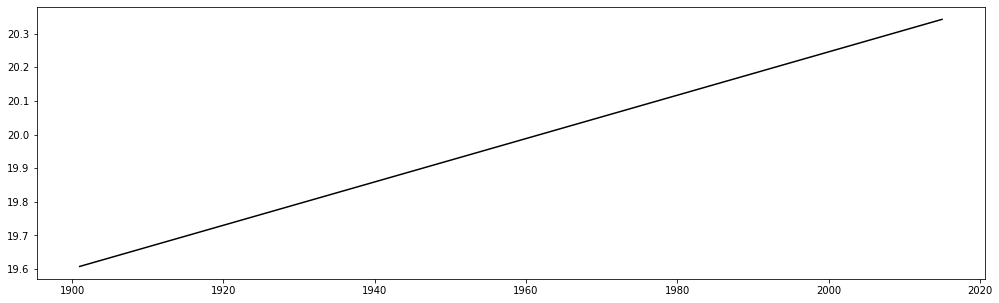

In [27]:
plt.figure(figsize=(17,5))
plt.plot(ndf['Year'],Reg.predict(Scaler.transform(ndf[['Year']])),color='black')